In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv("Grocery Store Sales Dataset in 2025.csv")

In [3]:
# Checking basic info
print(df.head())

   customer_id         store_name transaction_date           aisle  \
0         2824  GreenGrocer Plaza       2023-08-26         Produce   
1         5506   ValuePlus Market       2024-02-13           Dairy   
2         4657   ValuePlus Market       2023-11-23          Bakery   
3         2679  SuperSave Central       2025-01-13  Snacks & Candy   
4         9935  GreenGrocer Plaza       2023-10-13    Canned Goods   

   product_name  quantity  unit_price  total_amount  discount_amount  \
0         Pasta       2.0        7.46         14.92             0.00   
1        Cheese       1.0        1.85          1.85             3.41   
2        Onions       4.0        7.38         29.52             4.04   
3        Cereal       3.0        5.50         16.50             1.37   
4  Orange Juice       5.0        8.66         43.30             1.50   

   final_amount  loyalty_points  
0         14.92             377  
1         -1.56             111  
2         25.48             301  
3         

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1980 non-null   int64  
 1   store_name        1955 non-null   object 
 2   transaction_date  1980 non-null   object 
 3   aisle             1980 non-null   object 
 4   product_name      1980 non-null   object 
 5   quantity          1980 non-null   float64
 6   unit_price        1980 non-null   float64
 7   total_amount      1980 non-null   float64
 8   discount_amount   1980 non-null   float64
 9   final_amount      1980 non-null   float64
 10  loyalty_points    1980 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 170.3+ KB
None


In [14]:
# Fixing mixed date formats
df["transaction_date"] = pd.to_datetime(df["transaction_date"], errors='coerce', dayfirst=True)

# Handling missing store names (25 nulls)
df["store_name"] = df["store_name"].fillna("Unknown Store")

# Removing negative final amounts if any (basic cleanup)
df = df[df["final_amount"] >= 0]

# Dropping duplicates
df = df.drop_duplicates()

# Recheck dataset
print(df.isnull().sum())

customer_id         0
store_name          0
transaction_date    0
aisle               0
product_name        0
quantity            0
unit_price          0
total_amount        0
discount_amount     0
final_amount        0
loyalty_points      0
profit_leakage      0
discount_percent    0
revenue_per_unit    0
dtype: int64


C:\Users\sandeep joshi\AppData\Local\Temp\ipykernel_10868\1154092329.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(stores))


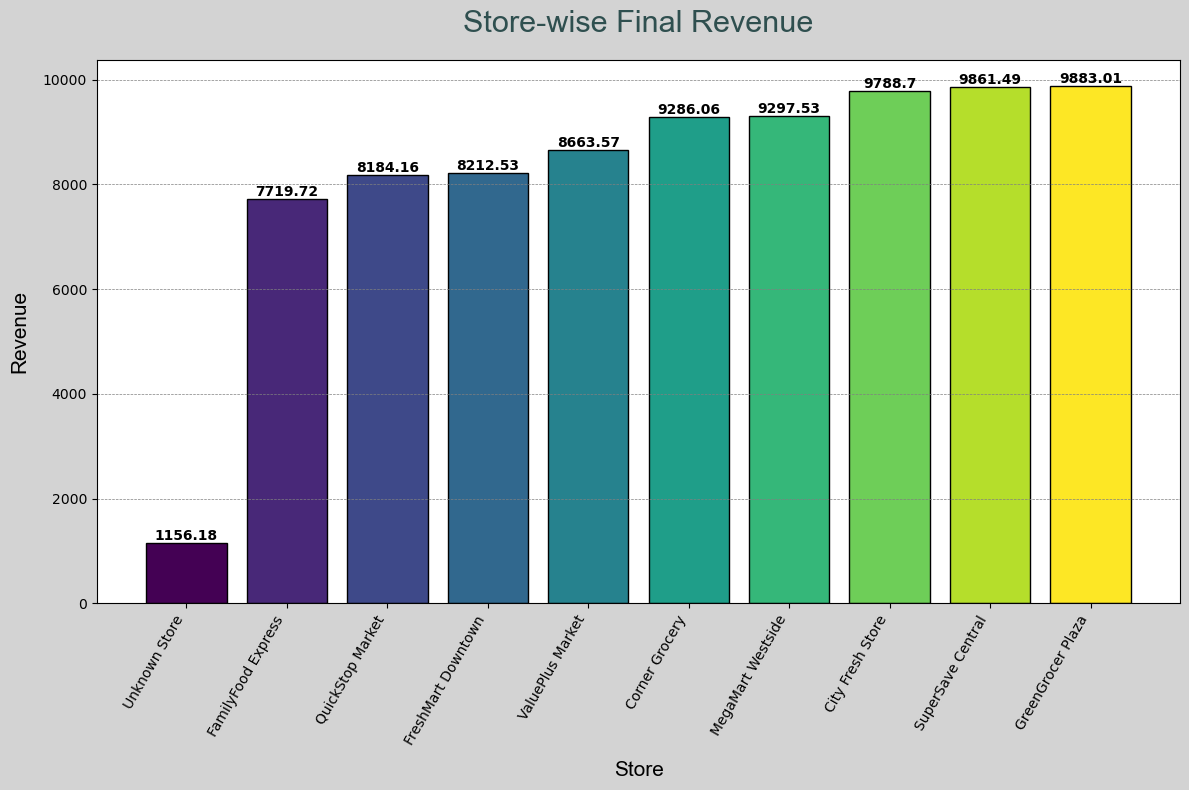

In [25]:
# 1. Store-wise Revenue Calculation
store_rev = (df.groupby("store_name")["final_amount"]
             .sum() .sort_values())
    
# Extract index & values
stores = store_rev.index
revenues = store_rev.values

# Create cmap (using matplotlib colormap)
cmap = plt.cm.get_cmap('viridis', len(stores))
colors = [cmap(i) for i in range(len(stores))]   # Generate unique color for each bar

plt.figure(figsize=(12, 8), facecolor='lightgray')

plt.title('Store-wise Final Revenue',
          fontdict={'family': 'Arial', 'size': 22, 'color': 'darkslategray'}, pad=20)

# Bar Chart with cmap colors
plt.bar(stores,  revenues,
        color=colors,  # <-- using cmap colors here
        edgecolor='black')

# Axis Labels
plt.xlabel('Store', fontdict={'family': 'Arial', 'size': 15, 'color': 'black'}, labelpad=10) 
plt.ylabel( 'Revenue',fontdict={'family': 'Arial', 'size': 15, 'color': 'black'}, labelpad=10)

for i in range(len(revenues)):
    plt.annotate(
        text=str(round(revenues[i], 2)),
        xy=(i, revenues[i]),
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=10,
        fontweight='bold')
    
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', color='grey', linewidth=0.5)
plt.tight_layout()
plt.show()

C:\Users\sandeep joshi\AppData\Local\Temp\ipykernel_10868\1516060696.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('plasma', len(aisles))


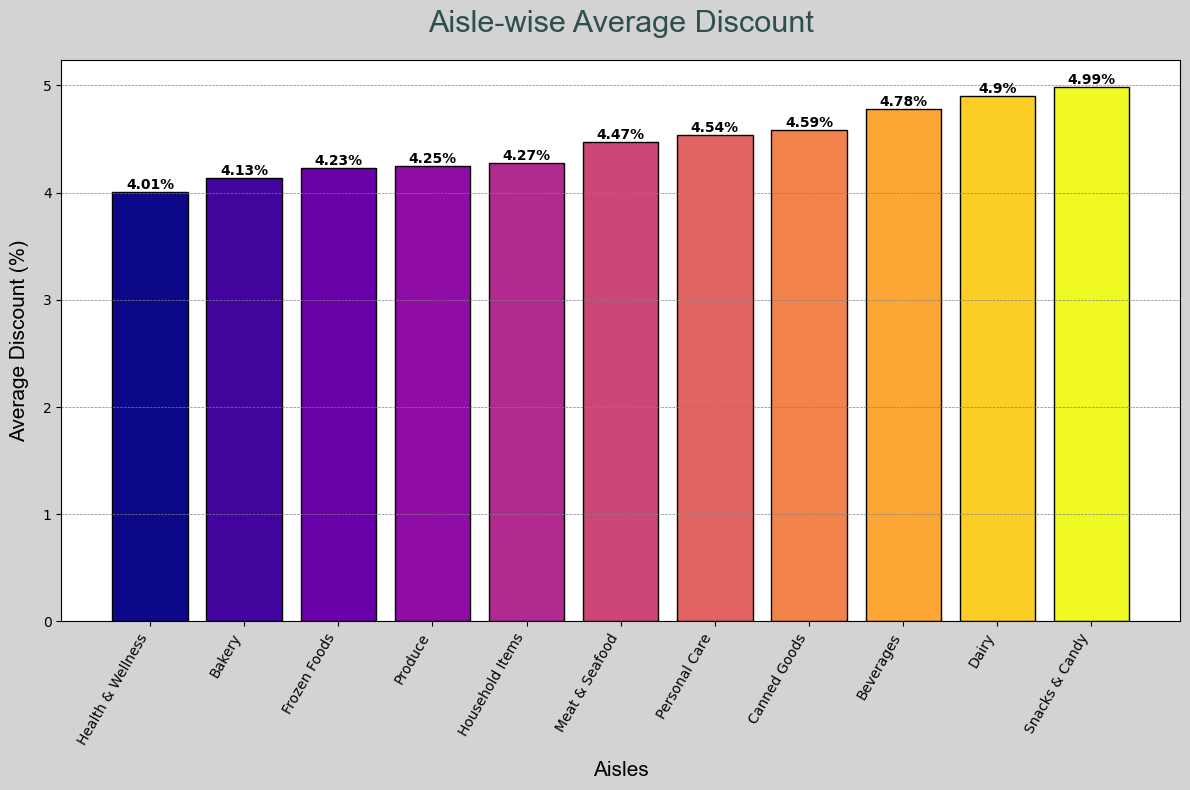

In [39]:
# 2. Aisle-wise Average Discount
aisle_discount = (
    df.groupby("aisle")["discount_amount"]
      .mean()
      .sort_values())

aisles = aisle_discount.index
avg_discount = aisle_discount.values

# Colormap for professional look
cmap = plt.cm.get_cmap('plasma', len(aisles))
colors = [cmap(i) for i in range(len(aisles))]

plt.figure(figsize=(12, 8), facecolor='lightgray')

plt.title('Aisle-wise Average Discount',
          fontdict={'family': 'Arial', 'size': 22, 'color': 'darkslategray'}, pad=20)

plt.bar(aisles, avg_discount, color=colors,
        edgecolor='black', linewidth=1)

plt.xlabel( 'Aisles', fontdict={'family': 'Arial', 'size': 15, 'color': 'black'}, labelpad=10)
plt.ylabel('Average Discount (%)', fontdict={'family': 'Arial', 'size': 15, 'color': 'black'}, labelpad=10)

# Annotation ---
for i in range(len(avg_discount)):
    plt.annotate(
        text=f"{round(avg_discount[i], 2)}%",     # % sign added + 2 decimals
        xy=(i, avg_discount[i]),
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=10,
        fontweight='bold',
        color='black')

plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()

C:\Users\sandeep joshi\AppData\Local\Temp\ipykernel_10868\3610269718.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(products))


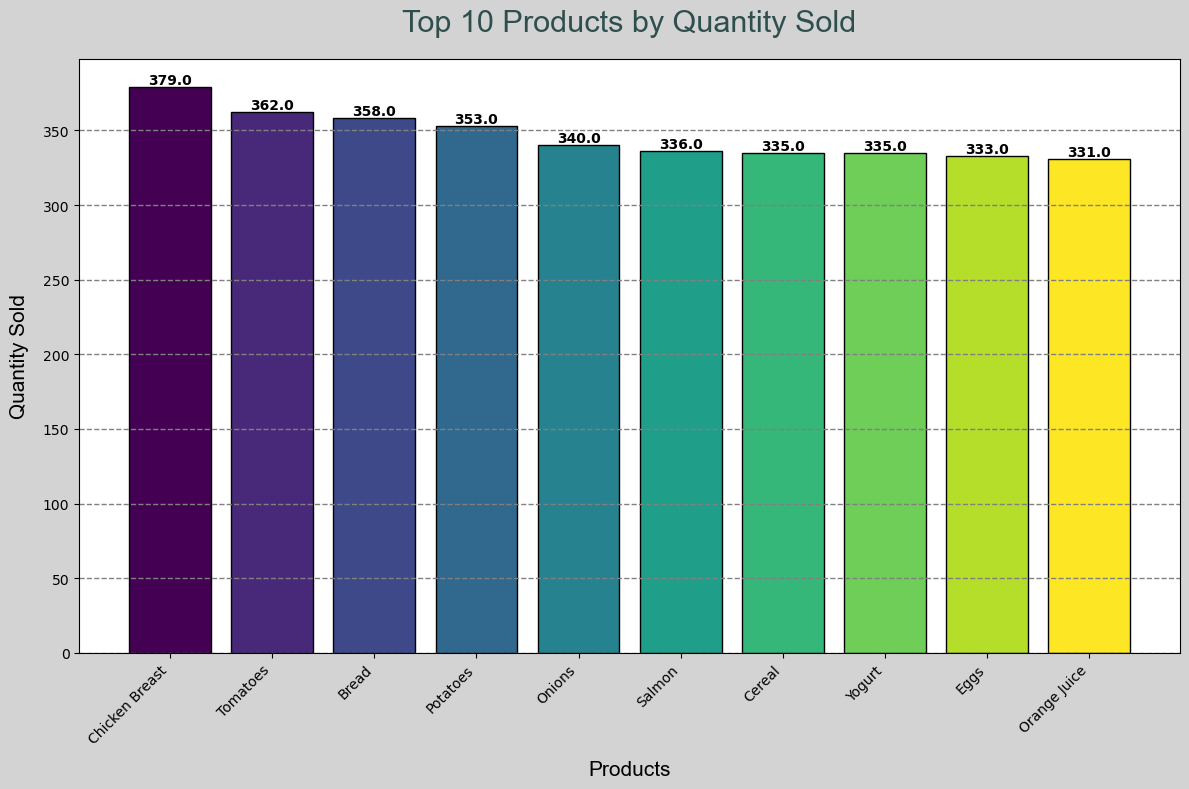

In [47]:
# 3. Top 10 products by sale quantity
top_products = (
    df.groupby("product_name")["quantity"]
      .sum()
      .sort_values(ascending=False)
      .head(10))

products = top_products.index
quantities = top_products.values

# colormap
cmap = plt.cm.get_cmap('viridis', len(products))
colors = [cmap(i) for i in range(len(products))]

plt.figure(figsize=(12, 8), facecolor='lightgray')

plt.title("Top 10 Products by Quantity Sold",
           fontdict={'family': 'Arial', 'size': 22, 'color': 'darkslategray'}, pad=20)

plt.bar(products, quantities,
        color=colors, edgecolor='black', linewidth=1)

plt.xlabel( 'Products', fontdict={'family': 'Arial', 'size': 15, 'color': 'black'}, labelpad=10)

plt.ylabel('Quantity Sold', fontdict={'family': 'Arial', 'size': 15, 'color': 'black'}, labelpad=10)

# Annotation
for i in range(len(quantities)):
    plt.annotate(
        text=str(round(quantities[i], 2)),   # clean rounded values
        xy=(i, quantities[i]),
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=10,
        fontweight='bold',
        color='black')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=1, color='grey')
plt.tight_layout()
plt.show()

In [56]:
# Profit loss due to discount
df["profit_leakage"] = df["total_amount"] - df["final_amount"]

# Discount %
df["discount_percent"] = (df["discount_amount"] / df["total_amount"]) * 100

# Revenue per unit
df["revenue_per_unit"] = df["final_amount"] / df["quantity"]

# Extract month for time-based analysis
df["transaction_month"] = df["transaction_date"].dt.month

In [59]:
# Preview new columns
print(df[["discount_percent", "profit_leakage", "revenue_per_unit", "transaction_month"]].head())

   discount_percent  profit_leakage  revenue_per_unit  transaction_month
0          0.000000            0.00          7.460000                  8
2         13.685637            4.04          6.370000                 11
3          8.303030            1.37          5.043333                  1
4          3.464203            1.50          8.360000                 10
5          2.356230            1.77         24.450000                  8


In [62]:
df.to_csv("cleaned_grocery_data.csv", index=False)